# Problem 1: Linear Regression

### You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Data Dictionary:

## Variable Name Description

Carat	-  Carat weight of the cubic zirconia.

Cut	 - Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color -	 Colour of the cubic zirconia.With D being the best and J the worst.

Clarity	- cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth - The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table -  The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price -	 the Price of the cubic zirconia.

X -	 Length of the cubic zirconia in mm.

Y -	 Width of the cubic zirconia in mm.

Z	 Height of the cubic zirconia in mm.


## Problem Statement 1: 
### Help the company in predicting the price for the stone on the bases of the details given in the dataset and provide them with the best 5 attributes that are most important.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot

In [2]:
cubz = pd.read_csv('cubic_zirconia.csv').drop('Unnamed: 0',axis=1)
cubz.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
cubz.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


- There are a total of 26967 rows and 11 columns in the dataset. The first column is just a label column and will not be used in the analysis. Hence, we have droped it when loading the dataset. So, we are now left with 10 columns.

In [4]:
cubz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


- There are 6 continuous and 3 categorical variables and 1 more continuous variable which is also our response/target variable of "Price"
- There are missing values in the variable "depth" which we will impute post further analysis.

In [5]:
(cubz == 0).sum(axis=0)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          3
y          3
z          9
price      0
dtype: int64

- We can observe that the variables of x, y and z have 0 as a value in some of the features. x variable has three 0's, y also has three 0's and z has nine o's in total. This is an incorrect feature as it is not possible in the real world to have any of the length, width or height as zero for a real cubic zirconia or any tangible product. Hence, we see these as either bad data or outliers and will treat them accordingly by imputing them appropriately. However, first we will relabel them appropriately to give them meaning. 

## Re-labeling Columns

In [6]:
cubz.rename(columns={'x': 'x_length', 'y': 'y_width', 'z': 'z_height'}, inplace=True)
cubz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   carat     26967 non-null  float64
 1   cut       26967 non-null  object 
 2   color     26967 non-null  object 
 3   clarity   26967 non-null  object 
 4   depth     26270 non-null  float64
 5   table     26967 non-null  float64
 6   x_length  26967 non-null  float64
 7   y_width   26967 non-null  float64
 8   z_height  26967 non-null  float64
 9   price     26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
cubz.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x_length,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y_width,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z_height,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


The mean and median values are very similar for all the independent variables except for the target variable of price. Price variable also has a very high standard deviation. We can also see that there seems to be outliers present in the dataset including for the target variable of 'price' as well. We also see some bad data in x_length, y_width and z_height variables which we will treat appropriately as well. 

In [8]:
cubz.describe(include='object').T

,count,unique,top,freq
cut,26967,5,Ideal,10816
color,26967,7,G,5661
clarity,26967,8,SI1,6571


There are total of 3 categorical variables, cut, color and clarity. There are 5 unique catogories for the cut variable with 'Ideal' type produced the most with a count of 10816, for color there are 7 unique types with G type used most with 5661 observations and for clarity there are 8 unique types with SI1 having a count of 6571 observations.

## Check for Duplicate records

In [9]:
dups = cubz.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

cubz[dups]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x_length,y_width,z_height,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [10]:
print('Before',cubz.shape)
cubz.drop_duplicates(inplace=True) 
print('After',cubz.shape)

Before (26967, 10)
After (26933, 10)


In [11]:
dups = cubz.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


We found 34 duplicate entries which we removed from the dataset

## Univariate Analysis

In [12]:
# Treating outliers for continuous variables 
cont = cubz.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(cont.columns.values)
len(lstnumericcolumns)

7

carat
Skew: 1.11


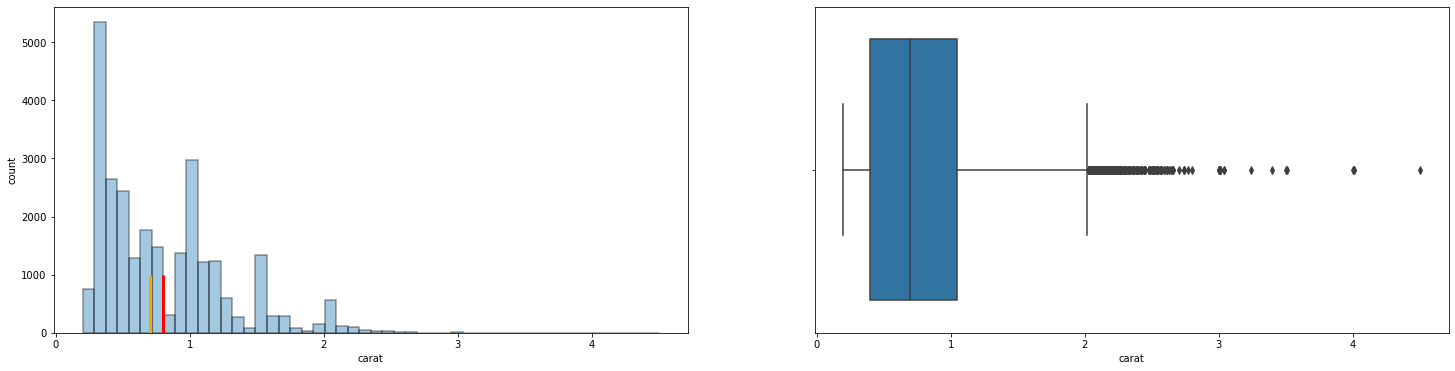

depth
Skew: -0.03


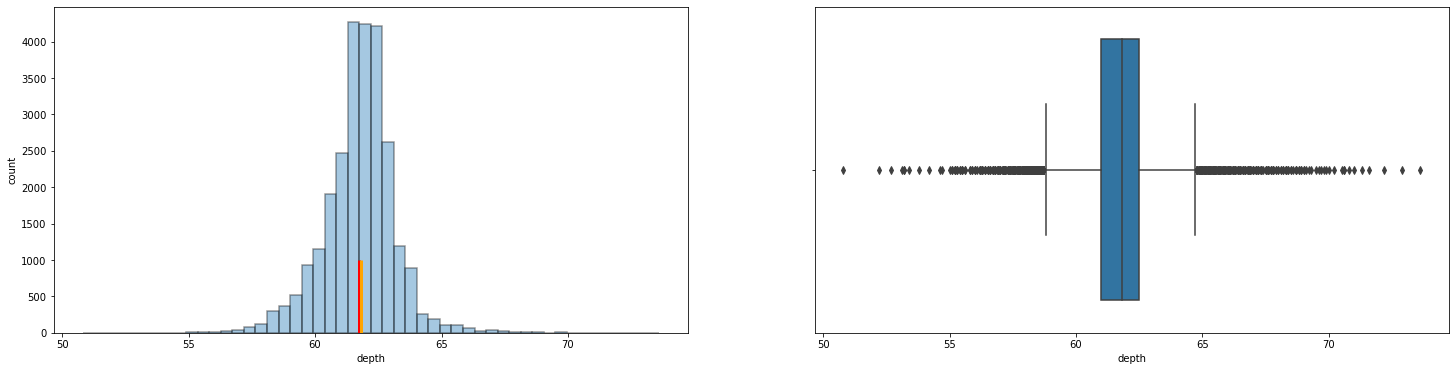

table
Skew: 0.77


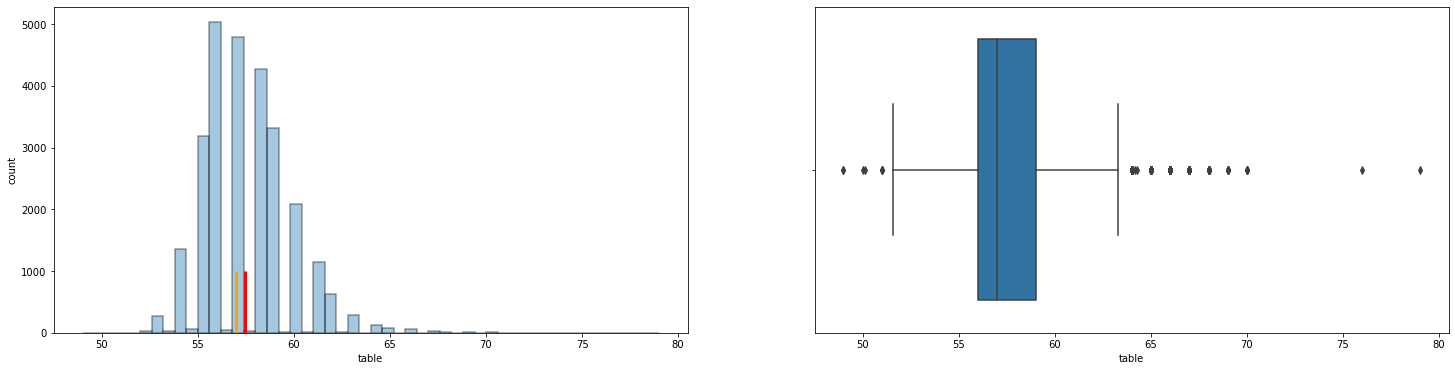

x_length
Skew: 0.39


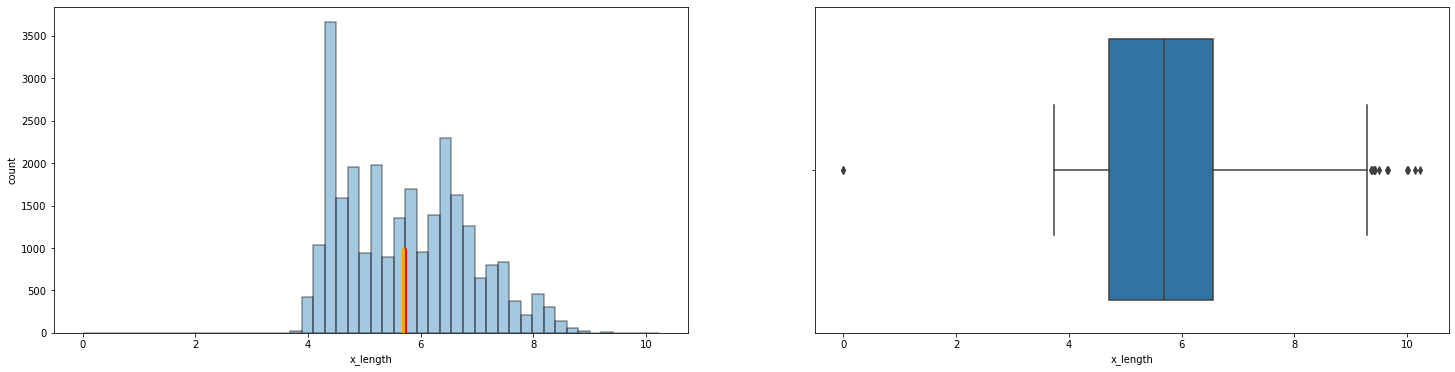

y_width
Skew: 3.87


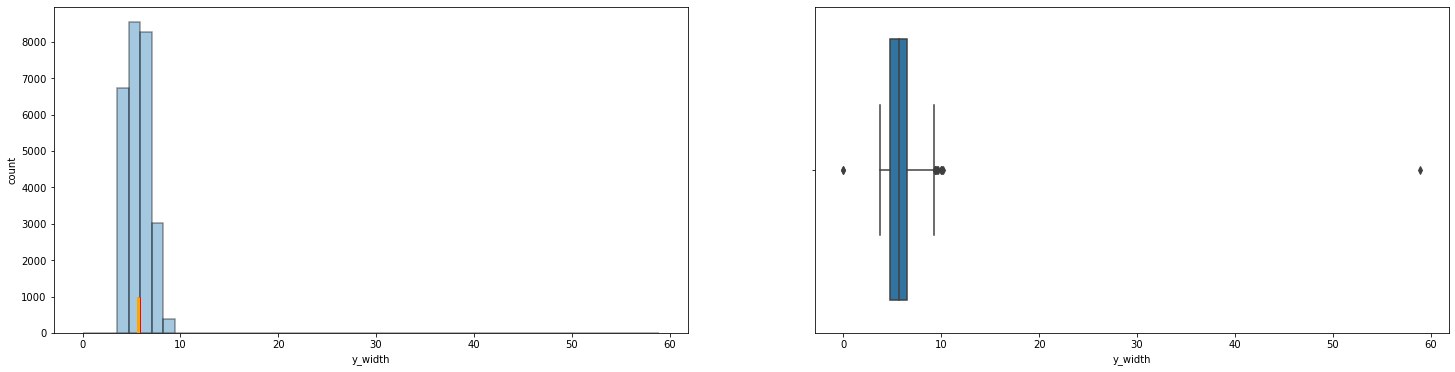

z_height
Skew: 2.58


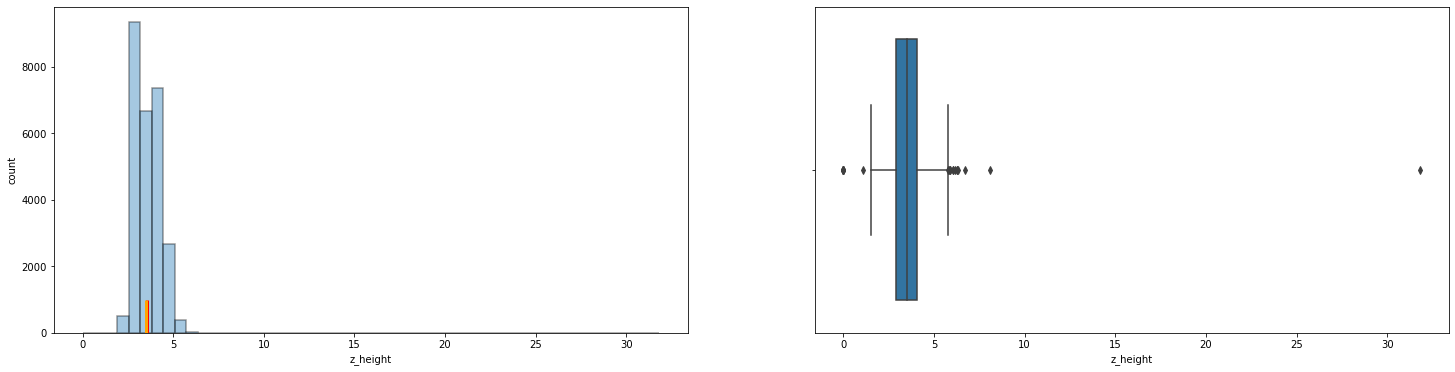

price
Skew: 1.62


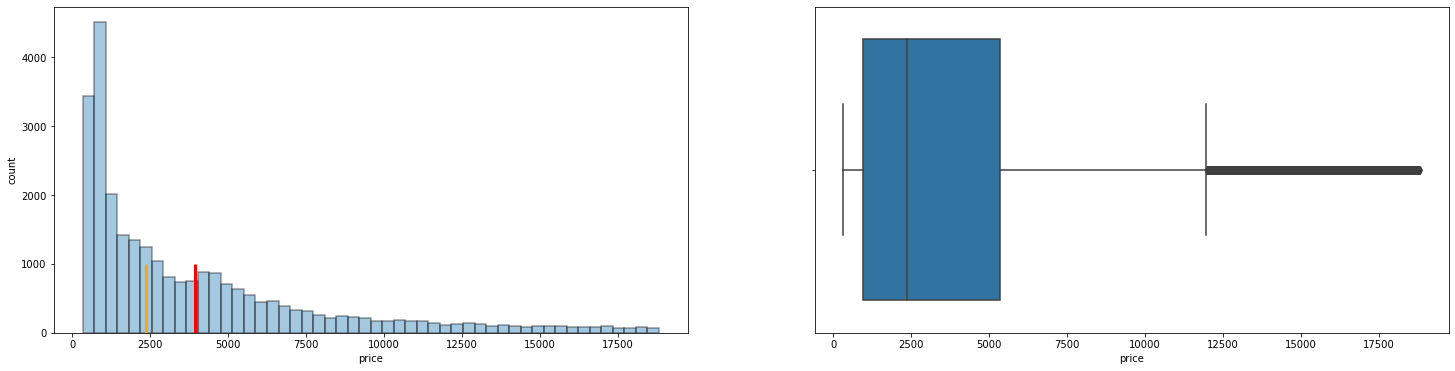

In [13]:
cont = cubz.select_dtypes(include = ['float64', 'int64'])
cols = list(cont.columns)
for col in cols:
    print(col)
    print('Skew:', np.round(cubz[col].skew(),2)) 
    plt.figure(figsize=(25,6))
    plt.subplot(1,2,1)
    sns.distplot(cubz[col],norm_hist=False,kde=False,hist_kws=dict(edgecolor='black',linewidth=1.5))
    plt.vlines(cubz[col].mean(),ymin=0, ymax=1000, color = 'red', linewidth=3)
    plt.vlines(cubz[col].median(),ymin=0, ymax=1000, color = 'orange', linewidth=3)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(cubz[col])
    plt.show()

- The diagram shows that except for 'depth' variable all of the other continuous variables are highly skewed. However, the means and medians of almost every independent variable are close to each other hence, they are nearly normally distributed. Also, there are outliers present in all of the continuous variables which can have a huge effect on regression. Therefore, we will be treating them appropriately.

##  Outlier Treatment

In [14]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [17]:
lrincome,urincome=remove_outlier(cubz['carat'])
cubz['carat']=np.where(cubz['carat']>urincome,urincome,cubz['carat'])
cubz['carat']=np.where(cubz['carat']<lrincome,lrincome,cubz['carat'])

lrincome,urincome=remove_outlier(cubz['depth'])
cubz['depth']=np.where(cubz['depth']>urincome,urincome,cubz['depth'])
cubz['depth']=np.where(cubz['depth']<lrincome,lrincome,cubz['depth'])

lrincome,urincome=remove_outlier(cubz['table'])
cubz['table']=np.where(cubz['table']>urincome,urincome,cubz['table'])
cubz['table']=np.where(cubz['table']<lrincome,lrincome,cubz['table'])

lrincome,urincome=remove_outlier(cubz['x_length'])
cubz['x_length']=np.where(cubz['x_length']>urincome,urincome,cubz['x_length'])
cubz['x_length']=np.where(cubz['x_length']<lrincome,lrincome,cubz['x_length'])

lrincome,urincome=remove_outlier(cubz['y_width'])
cubz['y_width']=np.where(cubz['y_width']>urincome,urincome,cubz['y_width'])
cubz['y_width']=np.where(cubz['y_width']<lrincome,lrincome,cubz['y_width'])

lrincome,urincome=remove_outlier(cubz['z_height'])
cubz['z_height']=np.where(cubz['z_height']>urincome,urincome,cubz['z_height'])
cubz['z_height']=np.where(cubz['z_height']<lrincome,lrincome,cubz['z_height'])

lrincome,urincome=remove_outlier(cubz['price'])
cubz['price']=np.where(cubz['price']>urincome,urincome,cubz['price'])
cubz['price']=np.where(cubz['price']<lrincome,lrincome,cubz['price'])

cubz.shape

(26933, 10)

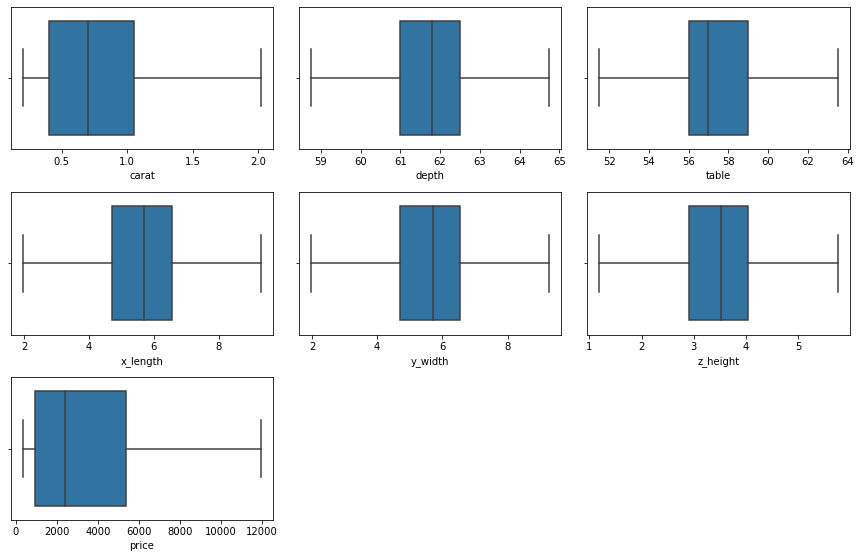

In [18]:
#Plotting Boxplots for Outlier visual
cont = cubz.select_dtypes(include = ['float64', 'int64'])
fig=plt.figure(figsize=(12,10))
for i in range(0,len(cont.columns)):
   ax=fig.add_subplot(4,3,i+1)
   sns.boxplot(cont[cont.columns[i]])
plt.tight_layout()

- We can see that the outliers for all the continuous independent variables are treated succesfully.

In [19]:
# Describing data post treating outliers
cubz.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.793298,0.462127,0.200,0.40,0.70,1.05,2.025
depth,26236.0,61.744144,1.259525,58.750,61.00,61.80,62.50,64.750
table,26933.0,57.435544,2.157119,51.500,56.00,57.00,59.00,63.500
x_length,26933.0,5.729323,1.126175,1.950,4.71,5.69,6.55,9.310
y_width,26933.0,5.731255,1.118155,1.965,4.71,5.70,6.54,9.285
z_height,26933.0,3.536928,0.696753,1.190,2.90,3.52,4.04,5.750
price,26933.0,3735.832213,3468.207359,326.000,945.00,2375.00,5356.00,11972.500


## Bivariate Analysis

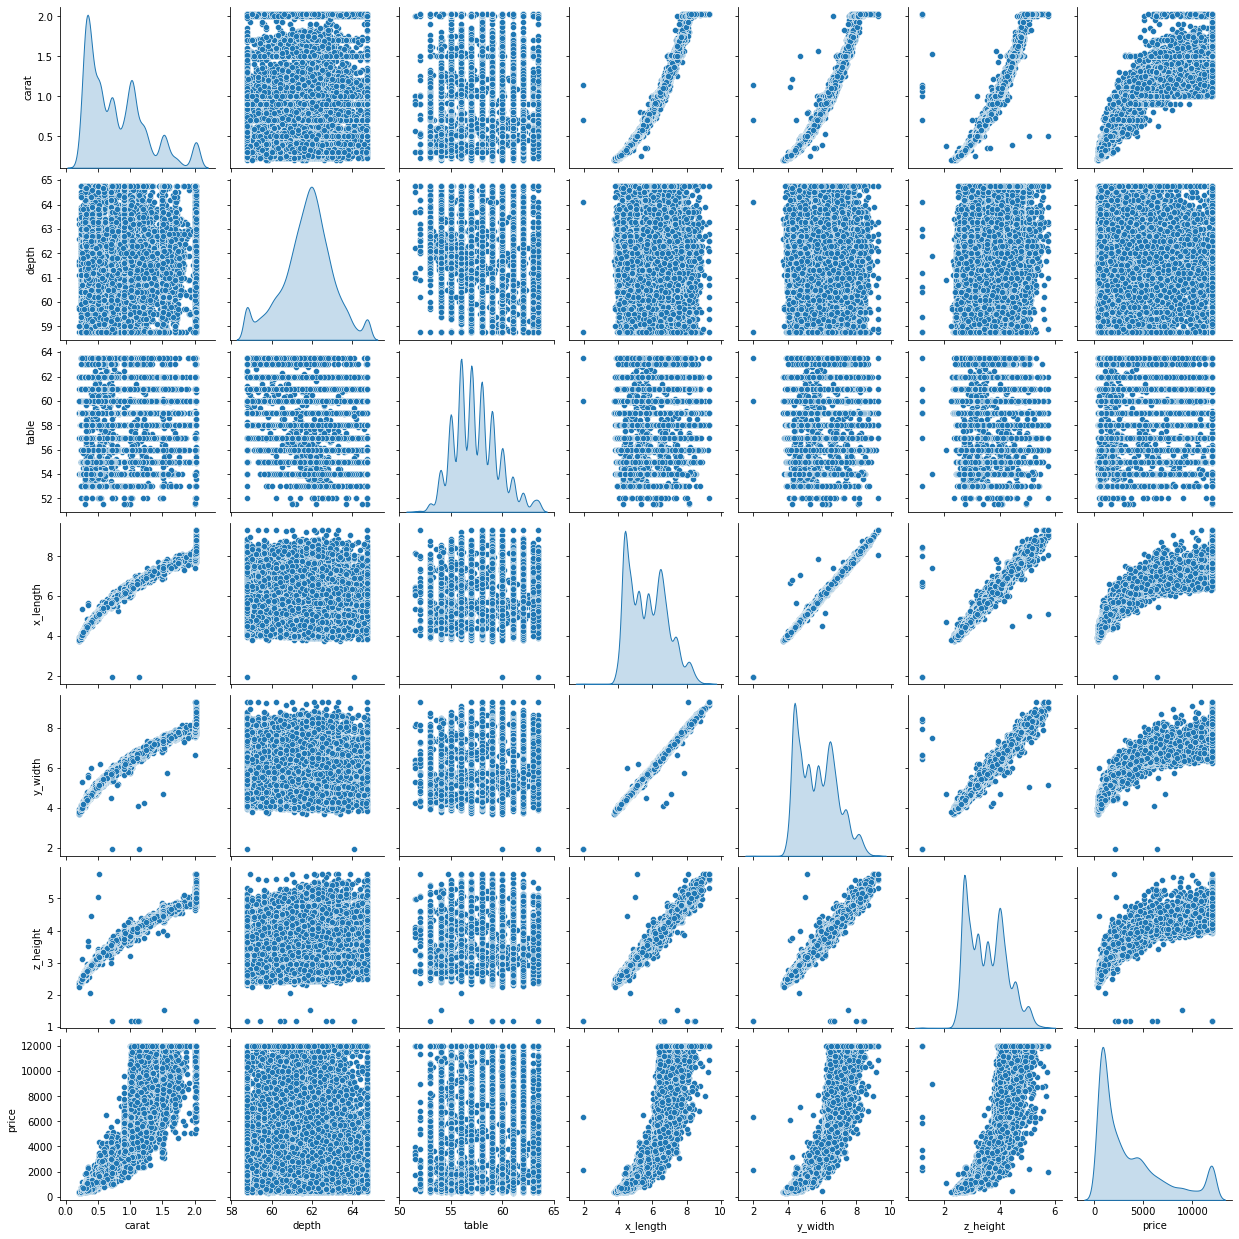

In [20]:
sns.pairplot(cubz, diag_kind='kde')

As can be seen above, apart from 'depth' variable which has a normal distribution. Skewness for carat variable has reduced after treating the outliers and x_length, y_width and z_height can be seen having similar distribution features however with clusters in them and also table variable too has many clusters in it. 

Price variable can be seen having strong correlation with the variables of carat, x_length, y_width and z_height but near no correlation with the other two variables of 'depth' and 'table'. Moreover, we can observe strong correlation between a few independent variables among themselves and no correlation for a few as well. We will explore these further in the below correlation heatmap.

## Correlation Heatmap

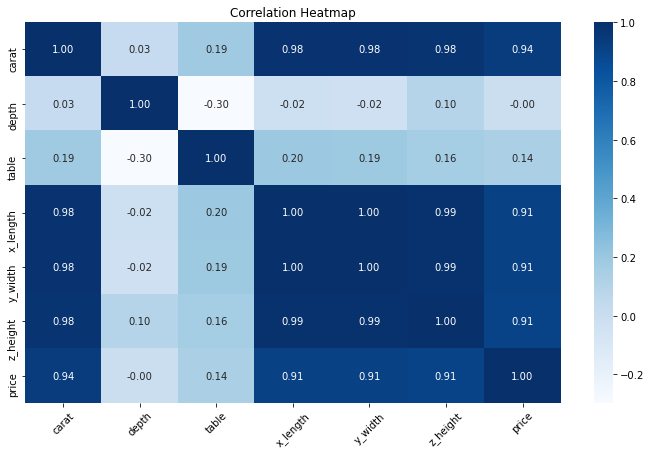

In [21]:
plt.figure(figsize=(12,7))
sns.heatmap(cubz.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

From the above figure, we can observe strong positive correlations between the following variables which clearly indicates presence of multicollinearity in them:

For Dependent 'price' variable and Independent Variables

- price and carat with correlation coefficient 0.94
- price and x_length with correlation coefficient 0.91
- price and y_width with correlation coefficient 0.91
- price and z_height with correlation coefficient 0.91

Between Independent Variables

- carat and x_length with correlation coefficient 0.98
- carat and y_width with correlation coefficient 0.98
- carat and z_height with correlation coefficient 0.98
- x_length and z_height with correlation coefficient 0.99
- y_width and z_height with correlation coefficient 0.99

From the above figure, we can observe perfect correlation between the following variables:
- x_length and y_width with correlation coefficient 1.00.

From the above figure, we can also observe inverse correlation between the following variables:
- depth and table with correlation coefficient (-0.30)

From the above figure, we can observe no linear relationship between the following variables:
- price and depth (correlation coefficient = 0.00) & Hence, 'depth' variable seems to come across as a poor predictor for 'price' variable.

<AxesSubplot:xlabel='carat', ylabel='price'>

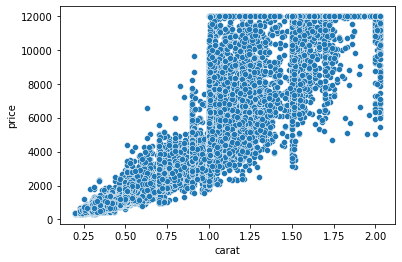

In [22]:
sns.scatterplot(x='carat', y='price', data=cubz)

We can see that the price increases with increase in carat weight.

<AxesSubplot:xlabel='x_length', ylabel='price'>

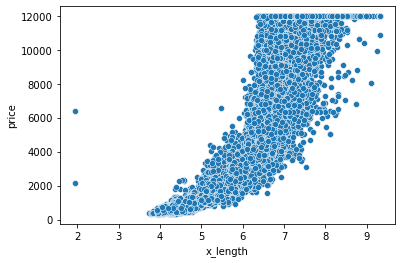

In [23]:
sns.scatterplot(x='x_length', y='price', data=cubz)

<AxesSubplot:xlabel='y_width', ylabel='price'>

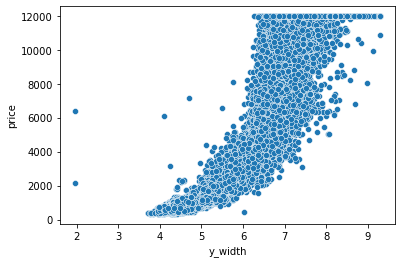

In [24]:
sns.scatterplot(x='y_width', y='price', data=cubz)

<AxesSubplot:xlabel='z_height', ylabel='price'>

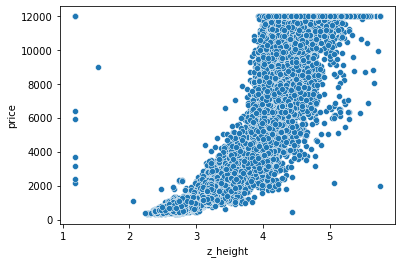

In [25]:
sns.scatterplot(x='z_height', y='price', data=cubz)

<AxesSubplot:xlabel='depth', ylabel='price'>

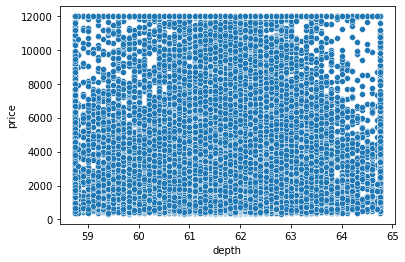

In [26]:
sns.scatterplot(x='depth', y='price', data=cubz)

<AxesSubplot:xlabel='table', ylabel='price'>

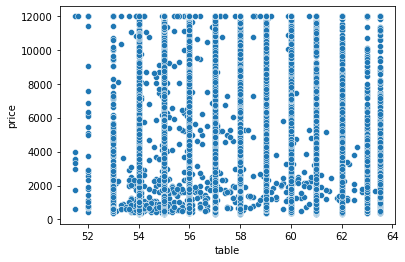

In [27]:
sns.scatterplot(x='table', y='price', data=cubz)

We also see that the target variable 'price' is positively correlated to the 'x_length', 'y_width' and 'z_height' variables but not with 'depth' and 'table'.

## Imputing Missing Values

In [28]:
cubz.isnull().sum()[cubz.isnull().sum()>0]

depth    697
dtype: int64

In [29]:
cubz[cubz.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x_length,y_width,z_height,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803.0
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501.0
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292.0
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177.0
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340.0
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673.0
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321.0
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343.0
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882.0


In [30]:
cubz['depth'].replace(np.nan,cubz['depth'].median(),inplace=True)

In [31]:
cubz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   carat     26933 non-null  float64
 1   cut       26933 non-null  object 
 2   color     26933 non-null  object 
 3   clarity   26933 non-null  object 
 4   depth     26933 non-null  float64
 5   table     26933 non-null  float64
 6   x_length  26933 non-null  float64
 7   y_width   26933 non-null  float64
 8   z_height  26933 non-null  float64
 9   price     26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


We have imputed the missing Nan values with the median values for 'depth' variable appropriately and there are no more missing values in our dataset. Also, we had also imputed the variables of x_length, y_width and z_height with 0 value with the .25 quantile value for their respective columns when treating the outliers earliers.

Also, scaling is not necessary here as scaling will not effect the train and test scores. However, we will also run the analysis on the scaled train data after initial analysis. 

## Encoding Categorical Variables

In [33]:
columns= cubz.select_dtypes(include='object').columns
for i in columns:
    print('\n')
    print ('---- {} ----'.format(i),cubz[i].nunique())
    print(pd.DataFrame([cubz[i].value_counts().sort_values(),
                       round(cubz[i].value_counts()/cubz.shape[0]*100,2)],index=['Count','Percent']).T)
    print('\n')



---- cut ---- 5
             Count  Percent
Fair         780.0     2.90
Good        2435.0     9.04
Very Good   6027.0    22.38
Premium     6886.0    25.57
Ideal      10805.0    40.12




---- color ---- 7
    Count  Percent
J  1440.0     5.35
I  2765.0    10.27
D  3341.0    12.40
H  4095.0    15.20
F  4723.0    17.54
E  4916.0    18.25
G  5653.0    20.99




---- clarity ---- 8
       Count  Percent
I1     364.0     1.35
IF     891.0     3.31
VVS1  1839.0     6.83
VVS2  2530.0     9.39
VS1   4087.0    15.17
SI2   4564.0    16.95
VS2   6093.0    22.62
SI1   6565.0    24.38




Above we can see the count of unique features in our three categorical variables of 'cut', 'color' & 'clarity'. We observe that cut variable has 5 unique features, color has 7 and clarity has 8. 

In the cut variable, 'Ideal' feature which also happens to be the best quality of the lot, has the highest proportion of approx 40% and the worst quality of 'Fair' is also least in proportion of only approx 3%. Hence, maximum proportion of the quality of the cubic zirconia is of the highest standard with features of 'Very Good' (22.38%), 'Premium' (25.57%) and 'Ideal' (40.12%) qualities making up of approx 88% of the dataset. Whereas, poor features of 'Good' (9.04%) and 'Fair' (2.90%) make up for the rest of the approx only 12% of the proportion. 
---- cut ---- 5
             Count  Percent
Fair         780.0     2.90
Good        2435.0     9.04
Very Good   6027.0    22.38
Premium     6886.0    25.57
Ideal      10805.0    40.12

In the color variable, similar to the observation made for the cut variable earlier, the worst feature 'J' counts for only approx 5% of the dataset and the top 4 features of 'D' (12.40%), 'E' (18.25%), 'F' (17.54%) & 'G' (20.99%) cover approx 70% of dataset. 'G', an average feature has the highest proportion in the dataset and most of the features have similar proportions in the dataset. Therefore, individual features in the color variable might not offer a good amount of variance and hence, it maybe a good practice to combine a few features for this variable. 
---- color ---- 7
    Count  Percent
J  1440.0     5.35
I  2765.0    10.27
D  3341.0    12.40
H  4095.0    15.20
F  4723.0    17.54
E  4916.0    18.25
G  5653.0    20.99

The clarity variable has only 8 unique features out of the total 13 for this dataset with no record of the best feature of 'FL'. Also, this variable has more proportion of average quality features of clarity such as SI1 with highest proportion of 24.38% followed by VS2 with 22.62%, SI2 with 16.95% and 'VS1' (15.17), which in total comes upto approx 80%. Whereas, the top quality features of 'IF' (3.31%), 'VVS1' (6.83%) & 'VVS2'(9.39%) comprise of most of the balance proportion of only approx 20% of the dataset. These top quality features can be combined for model building as well to see if our model improves or not.

---- clarity ---- 8
       Count  Percent
I1     364.0     1.35
IF     891.0     3.31
VVS1  1839.0     6.83
VVS2  2530.0     9.39
VS1   4087.0    15.17
SI2   4564.0    16.95
VS2   6093.0    22.62
SI1   6565.0    24.38

## Converting categorical ordinal variables into numeric variables

In [34]:
cubz['cut']=np.where(cubz['cut'] =='Fair', '0', cubz['cut'])
cubz['cut']=np.where(cubz['cut'] =='Good', '1', cubz['cut'])
cubz['cut']=np.where(cubz['cut'] =='Very Good', '2', cubz['cut'])
cubz['cut']=np.where(cubz['cut'] =='Premium', '3', cubz['cut'])
cubz['cut']=np.where(cubz['cut'] =='Ideal', '4', cubz['cut'])

cubz['color']=np.where(cubz['color'] =='J', '0', cubz['color'])
cubz['color']=np.where(cubz['color'] =='I', '1', cubz['color'])
cubz['color']=np.where(cubz['color'] =='H', '2', cubz['color'])
cubz['color']=np.where(cubz['color'] =='G', '3', cubz['color'])
cubz['color']=np.where(cubz['color'] =='F', '4', cubz['color'])
cubz['color']=np.where(cubz['color'] =='E', '5', cubz['color'])
cubz['color']=np.where(cubz['color'] =='D', '6', cubz['color'])

cubz['clarity']=np.where(cubz['clarity'] =='I1', '0', cubz['clarity'])
cubz['clarity']=np.where(cubz['clarity'] =='SI2', '1', cubz['clarity'])
cubz['clarity']=np.where(cubz['clarity'] =='SI1', '2', cubz['clarity'])
cubz['clarity']=np.where(cubz['clarity'] =='VS2', '3', cubz['clarity'])
cubz['clarity']=np.where(cubz['clarity'] =='VS1', '4', cubz['clarity'])
cubz['clarity']=np.where(cubz['clarity'] =='VVS2', '5', cubz['clarity'])
cubz['clarity']=np.where(cubz['clarity'] =='VVS1', '6', cubz['clarity'])
cubz['clarity']=np.where(cubz['clarity'] =='IF', '7', cubz['clarity'])

cubz.shape

(26933, 10)

In [35]:
cubz.head()

,carat,cut,color,clarity,depth,table,x_length,y_width,z_height,price
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4,4,6,60.4,59.0,4.35,4.43,2.65,779.0


In [36]:
cubz.tail()

,carat,cut,color,clarity,depth,table,x_length,y_width,z_height,price
26962,1.11,3,3,2,62.3,58.0,6.61,6.52,4.09,5408.0
26963,0.33,4,2,7,61.9,55.0,4.44,4.42,2.74,1114.0
26964,0.51,3,5,3,61.7,58.0,5.12,5.15,3.17,1656.0
26965,0.27,2,4,5,61.8,56.0,4.19,4.20,2.60,682.0
26966,1.25,3,0,2,62.0,58.0,6.90,6.88,4.27,5166.0


In [37]:
## Converting the cut, color and clarity variables to numeric

cubz['cut'] = cubz['cut'].astype('int64')
cubz['color'] = cubz['color'].astype('int64')
cubz['clarity'] = cubz['clarity'].astype('int64')

cubz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   carat     26933 non-null  float64
 1   cut       26933 non-null  int64  
 2   color     26933 non-null  int64  
 3   clarity   26933 non-null  int64  
 4   depth     26933 non-null  float64
 5   table     26933 non-null  float64
 6   x_length  26933 non-null  float64
 7   y_width   26933 non-null  float64
 8   z_height  26933 non-null  float64
 9   price     26933 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.3 MB


## Train-Test Split

In [38]:
# Copy all the predictor variables into X dataframe
X = cubz.drop('price', axis=1)

# Copy target into the y dataframe. 
y = cubz[['price']]

In [39]:
X.head()

,carat,cut,color,clarity,depth,table,x_length,y_width,z_height
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96
4,0.31,4,4,6,60.4,59.0,4.35,4.43,2.65


In [40]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

## Linear Regression Model

In [41]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8830.4788331669
The coefficient for cut is 110.85527008894519
The coefficient for color is 278.00256097637896
The coefficient for clarity is 440.55690297568236
The coefficient for depth is -7.494044280021843
The coefficient for table is -12.369930566283372
The coefficient for x_length is -1413.2161779425865
The coefficient for y_width is 1246.7786181443876
The coefficient for z_height is -310.68516993203536


From the above we observe the coefficients for each of the independent variables will affect the target variable price as below:

One unit increase in carat will increase price by 8830.4788331669
One unit increase in cut will increase the price by 110.85527008894519
One unit increase in color will increase the price by 278.00256097637896
One unit increase in clarity will increase the price by 440.55690297568236
One unit increase in y_width will increase the price by 1246.7786181443876

One unit increase in depth will decrease the price by -7.494044280021843
One unit increase in table will decrease the price by -12.369930566283372
One unit increase in x_length will decrease the price by -1413.2161779425865
One unit increase in z_height will decrease the price by -310.68516993203536

In [43]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2653.6946054818945


We can see a very high value for intercept at -2653.69 which seems meaningless. This clearly indicate that we need to scale the data to reduce the intercept closer to 0 for a better result.

In [44]:
regression_model.score(X_train, y_train)

0.9311671714263209

In [45]:
regression_model.score(X_test, y_test)

0.93121145382335

We can see the R2 value or coefficient of determinant value on as 0.9311671714263209 on training dataset and 0.93121145382335 on test data set.

## OLS 

In [46]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

,carat,cut,color,clarity,depth,table,x_length,y_width,z_height,price
22114,0.34,2,2,3,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,4,5,3,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,4,3,2,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,1,5,1,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,3,4,1,61.1,62.0,6.54,6.49,3.98,4057.0


In [47]:
# Multiple Linear Regression of price on all variables 
mod = ols('price ~ carat+cut+color+clarity+depth+table+x_length+y_width+z_height', data = data_train).fit() 
coefficients = mod.params
print(coefficients)

Intercept   -2653.694605
carat        8830.478833
cut           110.855270
color         278.002561
clarity       440.556903
depth          -7.494044
table         -12.369931
x_length    -1413.216178
y_width      1246.778618
z_height     -310.685170
dtype: float64


In [48]:
print(mod.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.832e+04
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        05:24:00   Log-Likelihood:            -1.5519e+05
No. Observations:               18853   AIC:                         3.104e+05
Df Residuals:                   18843   BIC:                         3.105e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2653.6946    697.034     -3.807      0.0

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0.

Moreover, depth the p-value for depth is 0.401 which is > alpha (0.05) which indicates it to be a poor predictor as we saw earlier as well where it was seen to have 0.00 correlation with the target variable of price. Hence, we can also try building a model without 'depth' variable. 

Also, the R2 and adjusted R2 values are high at 0.931 which can strongly suggest that the model built is a good one.

In [49]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [50]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

911.1428282209592

In [51]:
regression_model.score(X_test, y_test)

0.93121145382335

In [52]:
y_pred = regression_model.predict(X_test)

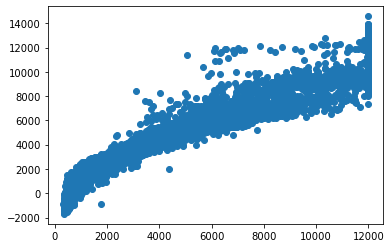

In [53]:
plt.scatter(y_test['price'], y_pred)

We see a strong correlation between the actual y and predicted y from the above figure with some error scene as well as even though most of the datapoints are concentrated close to each other there are a few which can are scattered.

## Train-Test with Scaled Data

In [54]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [55]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [56]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1723875257289447
The coefficient for cut is 0.035387587625326816
The coefficient for color is 0.13666645351785375
The coefficient for clarity is 0.2095283655675592
The coefficient for depth is -0.0026695246431296064
The coefficient for table is -0.007686919199415977
The coefficient for x_length is -0.4575854348690736
The coefficient for y_width is 0.400900013009097
The coefficient for z_height is -0.062242132418003096


In [57]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.626958599257964e-16


In [59]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9311988380020193

In [60]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [61]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.2622997560006123

As we observe here, scaling reduced the coefficients as well as the intercept closer to 0. However, it did not have any effect on the test score compared to the same for unscaled data.

## VIF

In [64]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [65]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1



carat ---> 112.84069217546832
cut ---> 9.74968052092832
color ---> 5.543448028180082
clarity ---> 5.422847428303261
depth ---> 949.7845695975695
table ---> 753.4137009972687
x_length ---> 10290.781663994765
y_width ---> 9327.239640925243
z_height ---> 1999.358484518994


The VIF is very high among all the independent variables which clearly indicates strong multicollinearity among the independent variables.

In [66]:
for i,j in np.array(mod.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-2653.69) * Intercept + (8830.48) * carat + (110.86) * cut + (278.0) * color + (440.56) * clarity + (-7.49) * depth + (-12.37) * table + (-1413.22) * x_length + (1246.78) * y_width + (-310.69) * z_height + 

## Conclusion

The final Linear Regression equation is

price = b0 + b1 * carat + b2 * cut + b3 * color + b4 * clarity + b5 * depth + b6 * table + b7 * x_length + b8 * y_width + b9 * z_height

price = (-2653.69) * Intercept + (8830.48) * carat + (110.86) * cut + (278.0) * color + (440.56) * clarity + (-7.49) * depth + (-12.37) * table + (-1413.22) * x_length + (1246.78) * y_width + (-310.69) * z_height + 

When carat increases by 1 unit, price increases by 8830.48 units, keeping all other predictors constant. 
when cut increases by 1 unit, price increases by 110.86 units, keeping all other predictors constant.
When color increases by 1 unit, price increases by 278 units, keeping all other predictors constant.
When clarity increases by 1 unit, price increases by 440.56 units, keeping all other predictors constant.
When y_width increases by 1 unit, price increases by 1246.78 units, keeping all other predictors constant.

There are also some negative co-efficient values as below:
When depth increases by 1 unit, price decreases by -7.49 units, keeping all other predictors constant. 
When table increases by 1 unit, price decreases by -12.37 units, keeping all other predictors constant. 
When x_length increases by 1 unit, price decreases by -1413.22 units, keeping all other predictors constant. 
When z_height increases by 1 unit, price decreases by -310.69 units, keeping all other predictors constant. 

Therefore, we can conclude that the top 5 attributes that are most important are Carat, y_width, x_length, clarity and z_height that affect the price and in turn affects the profitability.